In [262]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.terminal.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%load_ext jupyternotify


The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


In [263]:
#CONSTANT 
import os

DATA_PATH = 'src/data/travel.csv'


In [264]:
data = pd.read_csv(DATA_PATH)
data.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [265]:
data['mean_income_per_member'] = data['AnnualIncome'] / data['FamilyMembers'].apply(lambda x : x +1)

In [266]:
data.corr()['TravelInsurance']

Unnamed: 0                0.006196
Age                       0.061060
AnnualIncome              0.396763
FamilyMembers             0.079909
ChronicDiseases           0.018190
TravelInsurance           1.000000
mean_income_per_member    0.283940
Name: TravelInsurance, dtype: float64

# Inspecting Missing Values

In [267]:
data.isnull().sum()
# No Missing Values

Unnamed: 0                0
Age                       0
Employment Type           0
GraduateOrNot             0
AnnualIncome              0
FamilyMembers             0
ChronicDiseases           0
FrequentFlyer             0
EverTravelledAbroad       0
TravelInsurance           0
mean_income_per_member    0
dtype: int64

In [268]:
data.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,mean_income_per_member
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323,175474.263267
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332,89427.474113
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000,30000.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000,108333.333333
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000,160000.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000,230000.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000,583333.333333


In [269]:
#Dropping Unamed:0 and Age
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [270]:
#inspecting all unique value 
for col in data.columns : 
    print('col_name: ',col)
    print(*(data[col].unique()))
    print("=="*100)

col_name:  Age
31 34 28 25 33 26 32 29 35 30 27
col_name:  Employment Type
Government Sector Private Sector/Self Employed
col_name:  GraduateOrNot
Yes No
col_name:  AnnualIncome
400000 1250000 500000 700000 1150000 1300000 1350000 1450000 800000 1400000 850000 1500000 1050000 350000 1100000 600000 900000 550000 300000 750000 1200000 1000000 950000 1700000 1750000 650000 450000 1650000 1800000 1550000
col_name:  FamilyMembers
6 7 4 3 8 9 5 2
col_name:  ChronicDiseases
1 0
col_name:  FrequentFlyer
No Yes
col_name:  EverTravelledAbroad
No Yes
col_name:  TravelInsurance
0 1
col_name:  mean_income_per_member
57142.857142857145 156250.0 100000.0 175000.0 77777.77777777778 230000.0 260000.0 337500.0 207142.85714285713 200000.0 40000.0 233333.33333333334 121428.57142857143 214285.7142857143 87500.0 500000.0 164285.7142857143 220000.0 60000.0 187500.0 160000.0 185714.2857142857 416666.6666666667 120000.0 225000.0 78571.42857142857 150000.0 212500.0 80000.0 280000.0 30000.0 140000.0 366666.66666

In [271]:
#Checking Outlier 
#plotting numerical data 
numerical_features = [x for x in data.select_dtypes(exclude='object').columns if x not in ['TravelInsurance','ChronicDiseases']]

for col in numerical_features : 
    print(f'skewness: {col},skew ={data[col].skew()}')
    data.loc[:,col] = np.log10(data.loc[:,col])
    print(f'skewness: {col},skew ={data[col].skew()}')


skewness: Age,skew =0.23962475139295264
skewness: Age,skew =0.11158160678157257
skewness: AnnualIncome,skew =0.07841699043593056
skewness: AnnualIncome,skew =-0.5949364822796337
skewness: FamilyMembers,skew =0.5611969123054563
skewness: FamilyMembers,skew =-0.24494221298475113
skewness: mean_income_per_member,skew =0.8905307509657725
skewness: mean_income_per_member,skew =-0.3859484469210295


Text(0, 15, '1277')

Text(0, 15, '710')

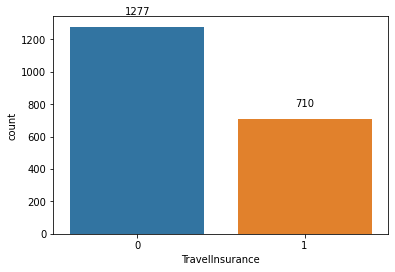

Text(0, 15, '930')

Text(0, 15, '505')

Text(0, 15, '347')

Text(0, 15, '205')

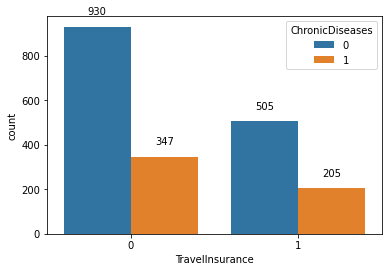

Text(0, 15, '1081')

Text(0, 15, '611')

Text(0, 15, '196')

Text(0, 15, '99')

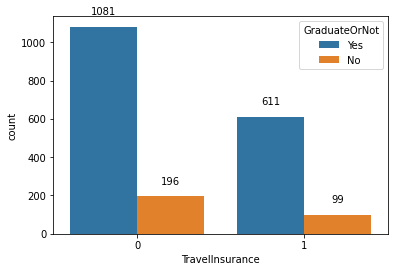

Text(0, 15, '1099')

Text(0, 15, '471')

Text(0, 15, '178')

Text(0, 15, '239')

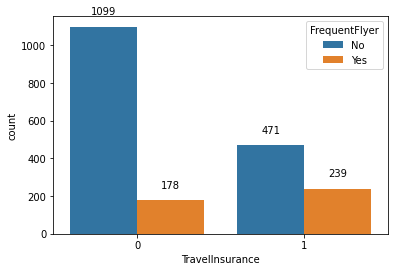

Text(0, 15, '1195')

Text(0, 15, '412')

Text(0, 15, '82')

Text(0, 15, '298')

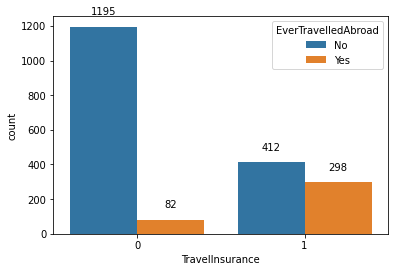

In [272]:

#EDA

diagram1 = sns.countplot(x='TravelInsurance',data=data)
    
for patch in diagram1.patches :
    plt.annotate(text=patch.get_height(),
                xy=(patch.get_x() + patch.get_width() / 2, 
                      patch.get_height()),
                verticalalignment='center',    # Center the text 
                horizontalalignment='center',  # from both directions
                xytext=(0, 15),
                textcoords='offset points')

plt.show()
diagram2= sns.countplot(x='TravelInsurance',hue='ChronicDiseases',data=data)
    
for patch in diagram2.patches :
    plt.annotate(text=patch.get_height(),
                xy=(patch.get_x() + patch.get_width() / 2, 
                      patch.get_height()),
                verticalalignment='center',    # Center the text 
                horizontalalignment='center',  # from both directions
                xytext=(0, 15),
                textcoords='offset points')
plt.show()
diagram3= sns.countplot(x='TravelInsurance',hue='GraduateOrNot',data=data)
    
for patch in diagram3.patches :
    plt.annotate(text=patch.get_height(),
                xy=(patch.get_x() + patch.get_width() / 2, 
                      patch.get_height()),
                verticalalignment='center',    # Center the text 
                horizontalalignment='center',  # from both directions
                xytext=(0, 15),
                textcoords='offset points')
plt.show()

diagram4= sns.countplot(x='TravelInsurance',hue='FrequentFlyer',data=data)
    
for patch in diagram4.patches :
    plt.annotate(text=patch.get_height(),
                xy=(patch.get_x() + patch.get_width() / 2, 
                      patch.get_height()),
                verticalalignment='center',    # Center the text 
                horizontalalignment='center',  # from both directions
                xytext=(0, 15),
                textcoords='offset points')
plt.show()

diagram5= sns.countplot(x='TravelInsurance',hue='EverTravelledAbroad',data=data)
    
for patch in diagram5.patches :
    plt.annotate(text=patch.get_height(),
                xy=(patch.get_x() + patch.get_width() / 2, 
                      patch.get_height()),
                verticalalignment='center',    # Center the text 
                horizontalalignment='center',  # from both directions
                xytext=(0, 15),
                textcoords='offset points')
plt.show()

# Insight from EDA  Categorical Chart Above : 
1. Number of One who buy vs dont buy insurance : 1277 : 710 -> imbalanced dataset 
2. People with chronic disease is less in both categories -> There is no significancy if people who has chronic disease buy insurance
3. People who Graduate still dominate in both categories 
4. Frequent Flyer : Yang Frequent flyer mostly buy insurance
5. Ever Travelled Abroad : People yang pernah pergi keluar memiliki kecenderungan yang lebih banyak beli insurance

<AxesSubplot:xlabel='TravelInsurance', ylabel='AnnualIncome'>

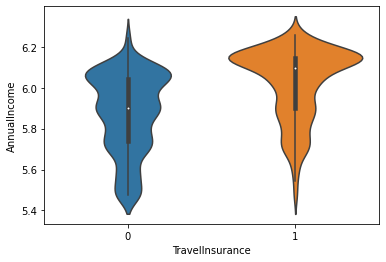

<AxesSubplot:xlabel='mean_income_per_member', ylabel='TravelInsurance'>

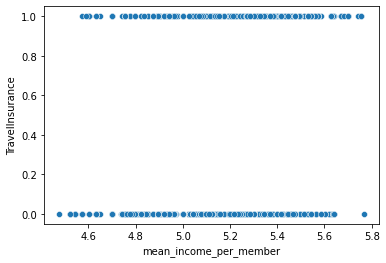

In [273]:
#Numerical Data  
# //TODO continue EDA for numerical data
sns.violinplot(y='AnnualIncome',x='TravelInsurance',data=data)
plt.show()
# sns.boxplot(y='Age',x='TravelInsurance',data=data)
sns.scatterplot(y='TravelInsurance',x='mean_income_per_member',data=data)

<AxesSubplot:>

<Figure size 864x576 with 0 Axes>

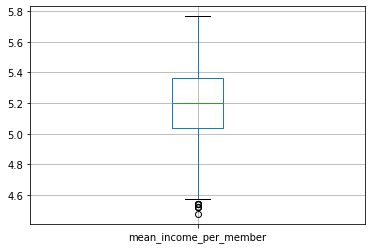

<Figure size 864x576 with 0 Axes>

In [274]:
data[['mean_income_per_member']].boxplot()
plt.figure(figsize=(12,8))


# INSIGHT : 
- People that buy Travel Insurance centered at higher income
-  age can not be traced pattern 
-  

## Categorical Encoding 
We have two ways in this case to do label encoding : 

1. Using Label Encoder in scikit learn for following feature : 
   docs : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
   b. FrequentFlyer
   c. EverTravelledAbroad
2. Using One Hot Encoding
   docs : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
   1. Employment Type 
   2. GraduateOrNot

In [275]:
# Jump into code // TODO continue implementing label encoder and one hot in python code

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label_encoder = LabelEncoder()

## looping to create newly formated data for each columns 
for col in ['FrequentFlyer','EverTravelledAbroad'] :
    # storing the result of labelling in store_tmp
    store_tmp = label_encoder.fit_transform(data[col])
    data[col] = store_tmp
data[['FrequentFlyer','EverTravelledAbroad']]



,FrequentFlyer,EverTravelledAbroad
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
1982,1,1
1983,0,1
1984,0,0
1985,1,1


In [276]:

# using pandas get_dummies to have instant column naming 
# if you want to use OneHotEncoder and naming its columns you can refer to this stack overflow : 
# https://stackoverflow.com/questions/56338847/how-to-give-column-names-after-one-hot-encoding-with-sklearn
## looping to create newly formated data for each columns 
data.shape
#splitting columns to be encoded
split_data = data[['Employment Type','GraduateOrNot']]
initial_data = data.drop(['Employment Type','GraduateOrNot'],axis=1)
#one hot encoding separated data
split_data = pd.get_dummies(split_data,drop_first=False)
#joining the data again 
data = pd.concat([initial_data,split_data],axis=1)


(1987, 10)

In [277]:
#lets take a look ata the data 
data.to_csv('src/data/preprocessed_data.csv',index=False)

## Splitting Dataset into Training and test set 
train : valid : test = 0.75 : 0.15 : 0.1

In [278]:
data['AnnualIncome'].value_counts()

5.903090    153
5.698970    143
6.146128    130
6.079181    112
6.041393    107
5.778151     98
5.845098     95
6.113943     91
5.477121     88
6.176091     82
6.021189     82
5.740363     81
6.060698     79
5.954243     72
6.096910     71
5.602060     65
5.875061     65
6.000000     60
5.929419     55
5.544068     55
6.130334     43
6.230449     37
6.161368     31
5.812913     30
5.977724     21
6.243038     15
5.653213     15
6.190332      5
6.255273      4
6.217484      2
Name: AnnualIncome, dtype: int64

In [279]:
correlation = data.corr()
correlation['TravelInsurance']

Age                                             0.049744
AnnualIncome                                    0.356465
FamilyMembers                                   0.072651
ChronicDiseases                                 0.018190
FrequentFlyer                                   0.232103
EverTravelledAbroad                             0.433183
TravelInsurance                                 1.000000
mean_income_per_member                          0.265126
Employment Type_Government Sector              -0.147847
Employment Type_Private Sector/Self Employed    0.147847
GraduateOrNot_No                               -0.018934
GraduateOrNot_Yes                               0.018934
Name: TravelInsurance, dtype: float64

In [280]:
from sklearn.model_selection import train_test_split
X = data.drop('TravelInsurance',axis=1)
y = data['TravelInsurance'].values.ravel()

In [281]:
#preserving the test set 
X_train,X_TEST,y_train,Y_TEST  = train_test_split(X,y,test_size=0.2)

In [282]:
# X_TRAIN,X_VALID,Y_TRAIN,Y_VALID = train_test_split(X_train,y_train,test_size=0.125)

In [283]:
#MODEL IMPORT 
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB, CategoricalNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn import metrics


In [284]:
list_of_models = [XGBClassifier(),CatBoostClassifier(),LGBMClassifier()]

In [285]:
from sklearn.model_selection import cross_validate,StratifiedKFold
cv = StratifiedKFold(n_splits=5)
score_dict_2 = {}
for model in list_of_models : 
    clf = model
    cv_results = cross_validate(clf, X, y, cv=cv,scoring=('accuracy', 'roc_auc','f1'))
    sorted(cv_results.keys())
    # clf.fit(X_train,y_train)
    # preds = clf.predict_proba(X_TEST)[:,1]
    # score_auc = metrics.roc_auc_score(Y_TEST,preds)
    score_dict_2[type(model).__name__] = cv_results
    # print(f'{type(model).__name__},roc auc score = {score_auc}')

['fit_time', 'score_time', 'test_accuracy', 'test_f1', 'test_roc_auc']

Learning rate set to 0.012555
0:	learn: 0.6857197	total: 2.05ms	remaining: 2.05s
1:	learn: 0.6781726	total: 4.01ms	remaining: 2s
2:	learn: 0.6724278	total: 5.41ms	remaining: 1.8s
3:	learn: 0.6669141	total: 7.46ms	remaining: 1.86s
4:	learn: 0.6614568	total: 9.61ms	remaining: 1.91s
5:	learn: 0.6544564	total: 11.3ms	remaining: 1.88s
6:	learn: 0.6477639	total: 13.2ms	remaining: 1.88s
7:	learn: 0.6423884	total: 14.9ms	remaining: 1.84s
8:	learn: 0.6370542	total: 16.5ms	remaining: 1.82s
9:	learn: 0.6314941	total: 18.1ms	remaining: 1.8s
10:	learn: 0.6254472	total: 21.1ms	remaining: 1.9s
11:	learn: 0.6202491	total: 23ms	remaining: 1.89s
12:	learn: 0.6159669	total: 24.8ms	remaining: 1.88s
13:	learn: 0.6106501	total: 28.1ms	remaining: 1.98s
14:	learn: 0.6059857	total: 30.1ms	remaining: 1.98s
15:	learn: 0.6016024	total: 31.8ms	remaining: 1.96s
16:	learn: 0.5962620	total: 36.6ms	remaining: 2.12s
17:	learn: 0.5922085	total: 43.5ms	remaining: 2.37s
18:	learn: 0.5877129	total: 45.5ms	remaining: 2.35s


['fit_time', 'score_time', 'test_accuracy', 'test_f1', 'test_roc_auc']

['fit_time', 'score_time', 'test_accuracy', 'test_f1', 'test_roc_auc']

In [286]:
print('accuracy')
np.mean(score_dict_2['XGBClassifier']['test_accuracy'])
np.mean(score_dict_2['CatBoostClassifier']['test_accuracy'])
np.mean(score_dict_2['LGBMClassifier']['test_accuracy'])

print('roc auc')
np.mean(score_dict_2['XGBClassifier']['test_roc_auc'])
np.mean(score_dict_2['CatBoostClassifier']['test_roc_auc'])
np.mean(score_dict_2['LGBMClassifier']['test_roc_auc'])

print('f1')
np.mean(score_dict_2['XGBClassifier']['test_f1'])
np.mean(score_dict_2['CatBoostClassifier']['test_f1'])
np.mean(score_dict_2['LGBMClassifier']['test_f1'])


accuracy


0.7931470956799108

0.8233510119868865

0.8127817930964646

roc auc


0.7978311628348523

0.7998861890706987

0.7991852431993924

f1


0.6812501497657392

0.7086567484420873

0.700223813283608

# XGBoost Training 

In [287]:
%%notify
import xgboost 
xgb_param  = {
            'objective':'binary:logistic',
            'max_depth': 6,
            'alpha': 6,
            'learning_rate': 0.01,
            'n_estimators':400
        }  
xgb_clf = xgboost.XGBClassifier(**xgb_param)
xgb_clf.fit(X_train,np.ravel(y_train))
prediction = xgb_clf.predict_proba(X_TEST)[:,1]
preds = xgb_clf.predict(X_TEST)
auc_score = metrics.roc_auc_score(Y_TEST,prediction)
accuracy_ = metrics.accuracy_score(Y_TEST,preds)

xgboost_result = pd.DataFrame({
    'model_name' : 'XGBClassifier', 
    'ACCURACY' : accuracy_, 
    'ROC AUC' : auc_score
},index=[1])

import joblib 
filename = 'src/xgb_model_without_tuning.pkl'

with open(filename,'wb') as f : 
    joblib.dump(xgb_clf,f)
print(accuracy_)
print(auc_score)
# 0.8492462311557789 = accuracy 
# 0.8161505080725585 = auc score 

XGBClassifier(alpha=6, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=6, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

0.8492462311557789
0.849135135135135


<IPython.core.display.Javascript object>

In [288]:
xgboost_result

,model_name,ACCURACY,ROC AUC
1,XGBClassifier,0.849246,0.849135


In [289]:
params={'max_depth': [x for x in range(3,16,1)],
        'gamma': [x for x in range(3,10,1)],
        'reg_alpha' : [x for x in range(40,180,10)],
        'reg_lambda' : [x for x in np.linspace(0,1,2)],
        'colsample_bytree' : [x for x in np.linspace(0.5,1,4)],
        'min_child_weight' : [x for x in range(0,10,1)],
        'n_estimators': [x for x in range(10,1100,100)],
        'subsample' : [x for x in np.linspace(0.5,1,2)], 
        'scale_pos_weight' : [x for x in np.linspace(0.5,1,5)], 
        'learning_rate' : [x for x in np.linspace(0.001,0.1,5)]
        
    }

In [290]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold
cv = StratifiedKFold(n_splits=5)
xgb = xgboost.XGBClassifier()
clf_model =RandomizedSearchCV(estimator=xgb,param_distributions=params,cv=cv)
search = clf_model.fit(X_train,y_train)

In [291]:
search.best_params_

{'subsample': 1.0,
 'scale_pos_weight': 0.875,
 'reg_lambda': 0.0,
 'reg_alpha': 40,
 'n_estimators': 910,
 'min_child_weight': 4,
 'max_depth': 11,
 'learning_rate': 0.1,
 'gamma': 8,
 'colsample_bytree': 0.5}

In [292]:
import xgboost 
xgb_param  = {
            'objective':'binary:logistic',
            'max_depth': 6,
            'alpha': 10,
            'learning_rate': 0.001,
            'n_estimators':1000
        }  
xgb_clf = xgboost.XGBClassifier(**xgb_param)
xgb_clf.fit(X_train,np.ravel(y_train))
prediction = xgb_clf.predict_proba(X_TEST)[:,1]
preds = xgb_clf.predict(X_TEST)
auc_score = metrics.roc_auc_score(Y_TEST,prediction)
accuracy_ = metrics.accuracy_score(Y_TEST,preds)
print(accuracy_)
print(auc_score)
# 0.8492462311557789 = accuracy 
# 0.8161505080725585 = auc score 

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

0.8467336683417085
0.8332432432432432


In [293]:
fix_param = XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing="nan", monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [294]:
#cross validation 
from xgboost import DMatrix,cv
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.0001,
                'max_depth': 5, 'alpha': 10}
dataset_matrix = DMatrix(data=X_train,label=y_train)
xgb_cv = cv(params=params,dtrain=dataset_matrix,num_boost_round=10,nfold=10,stratified=True,early_stopping_rounds=10
             ,metrics='auc', as_pandas=True, seed=42)

In [295]:
xgb_cv

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.664003,0.004229,0.656247,0.041857
1,0.703711,0.030717,0.693182,0.049922
2,0.750181,0.023743,0.731101,0.039532
3,0.761529,0.014754,0.745339,0.030249
4,0.770083,0.014192,0.754735,0.026186
5,0.770910,0.012173,0.758877,0.024681
6,0.772806,0.010151,0.761073,0.023487
7,0.778060,0.006935,0.768010,0.023387
8,0.780250,0.004883,0.773700,0.026587
9,0.780442,0.004626,0.774258,0.025479


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

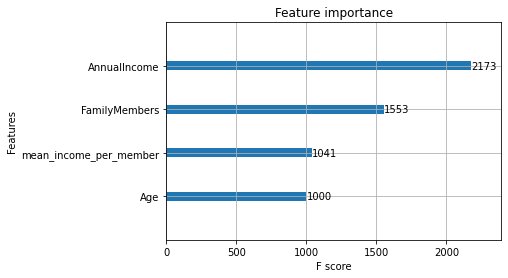

In [296]:
xgboost.plot_importance(xgb_clf)

In [297]:
# Light GBM 
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier 
lgb = LGBMClassifier()

lgb.fit(X_train,y_train)
preds = lgb.predict_proba(X_TEST)[:,1]
print(roc_auc_score(Y_TEST,preds))
#0.8005641899084522

LGBMClassifier()

0.8514594594594594


In [298]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier,VotingClassifier,StackingClassifier
from catboost import CatBoostClassifier
rf = RandomForestClassifier()
gbc = GradientBoostingClassifier()
cat_clf = CatBoostClassifier()
# voting_clf = VotingClassifier(estimators=[('lgb',lgb),('rf',rf),('gbc',gbc)],voting='hard') # best result auc 0.83
# stack_clf = StackingClassifier(estimators=[('lgb',lgb),('rf',rf),('gbc',gbc)],final_estimator=cat_clf,stack_method='predict_proba')



In [299]:
voting_clf = VotingClassifier(estimators=[('lgb',lgb),('rf',rf),('gbc',gbc),('cat',cat_clf)],voting='soft') 
# #best accuracy 0.8417085427135679

In [300]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=21)
result = cross_val_score(voting_clf,X_train,y_train,cv=cv)

Learning rate set to 0.011413
0:	learn: 0.6871374	total: 1.71ms	remaining: 1.71s
1:	learn: 0.6817630	total: 3.56ms	remaining: 1.78s
2:	learn: 0.6767582	total: 4.87ms	remaining: 1.62s
3:	learn: 0.6720907	total: 6.62ms	remaining: 1.65s
4:	learn: 0.6671959	total: 13.6ms	remaining: 2.71s
5:	learn: 0.6614637	total: 15.4ms	remaining: 2.55s
6:	learn: 0.6563397	total: 17.7ms	remaining: 2.51s
7:	learn: 0.6520047	total: 19.5ms	remaining: 2.41s
8:	learn: 0.6475483	total: 21.1ms	remaining: 2.32s
9:	learn: 0.6424198	total: 22.9ms	remaining: 2.26s
10:	learn: 0.6381139	total: 24.7ms	remaining: 2.22s
11:	learn: 0.6332454	total: 26.3ms	remaining: 2.16s
12:	learn: 0.6297620	total: 28.1ms	remaining: 2.14s
13:	learn: 0.6251983	total: 29.7ms	remaining: 2.09s
14:	learn: 0.6210779	total: 31.4ms	remaining: 2.06s
15:	learn: 0.6171612	total: 33.3ms	remaining: 2.04s
16:	learn: 0.6133321	total: 34.6ms	remaining: 2s
17:	learn: 0.6099196	total: 36.4ms	remaining: 1.99s
18:	learn: 0.6061487	total: 38ms	remaining: 1.9

In [301]:
result.mean()

0.8124437037477928

In [309]:
from sklearn import metrics
voting_clf.fit(X_train,y_train)
preds = voting_clf.predict_proba(X_TEST)[:,1]
prediction = voting_clf.predict(X_TEST)
acc =metrics.roc_auc_score(Y_TEST,preds)
auc_=metrics.accuracy_score(Y_TEST,prediction)
filename = 'src/voting_classifier.pkl'
joblib.dump(voting_clf,filename=filename)
voting_class_result = pd.DataFrame({
    'model_name' : 'VotingClasssifier(lightgbm,catboost,gradientboosting)', 
    'ACCURACY' : acc, 
    'ROC AUC' : auc_
},index=[1])
print('accuracy',acc)
print('roc auc',auc_)

Learning rate set to 0.012555
0:	learn: 0.6861597	total: 2.21ms	remaining: 2.21s
1:	learn: 0.6794631	total: 4.51ms	remaining: 2.25s
2:	learn: 0.6738873	total: 6.33ms	remaining: 2.1s
3:	learn: 0.6687190	total: 8.49ms	remaining: 2.11s
4:	learn: 0.6633276	total: 10.3ms	remaining: 2.05s
5:	learn: 0.6567614	total: 12.2ms	remaining: 2.02s
6:	learn: 0.6505217	total: 14.1ms	remaining: 2s
7:	learn: 0.6458618	total: 16ms	remaining: 1.98s
8:	learn: 0.6401054	total: 20.2ms	remaining: 2.23s
9:	learn: 0.6349211	total: 22.2ms	remaining: 2.2s
10:	learn: 0.6305074	total: 23.6ms	remaining: 2.13s
11:	learn: 0.6249865	total: 25.4ms	remaining: 2.09s
12:	learn: 0.6196452	total: 27.4ms	remaining: 2.08s
13:	learn: 0.6159105	total: 44.4ms	remaining: 3.13s
14:	learn: 0.6109078	total: 46.1ms	remaining: 3.03s
15:	learn: 0.6072719	total: 48.6ms	remaining: 2.99s
16:	learn: 0.6030249	total: 50.4ms	remaining: 2.91s
17:	learn: 0.5995173	total: 52.2ms	remaining: 2.85s
18:	learn: 0.5950172	total: 54.1ms	remaining: 2.79s

VotingClassifier(estimators=[('lgb', LGBMClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('gbc', GradientBoostingClassifier()),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x000002AE0594BDF0>)],
                 voting='soft')

['src/voting_classifier.pkl']

accuracy 0.8531621621621621
roc auc 0.8492462311557789


In [310]:
voting_class_result

,model_name,ACCURACY,ROC AUC
1,"VotingClasssifier(lightgbm,catboost,gradientbo...",0.853162,0.849246


In [311]:
voting_clf.get_params()

{'estimators': [('lgb', LGBMClassifier()),
  ('rf', RandomForestClassifier()),
  ('gbc', GradientBoostingClassifier()),
  ('cat', <catboost.core.CatBoostClassifier at 0x2ae0594bdf0>)],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'soft',
 'weights': None,
 'lgb': LGBMClassifier(),
 'rf': RandomForestClassifier(),
 'gbc': GradientBoostingClassifier(),
 'cat': <catboost.core.CatBoostClassifier at 0x2ae0594bdf0>,
 'lgb__boosting_type': 'gbdt',
 'lgb__class_weight': None,
 'lgb__colsample_bytree': 1.0,
 'lgb__importance_type': 'split',
 'lgb__learning_rate': 0.1,
 'lgb__max_depth': -1,
 'lgb__min_child_samples': 20,
 'lgb__min_child_weight': 0.001,
 'lgb__min_split_gain': 0.0,
 'lgb__n_estimators': 100,
 'lgb__n_jobs': -1,
 'lgb__num_leaves': 31,
 'lgb__objective': None,
 'lgb__random_state': None,
 'lgb__reg_alpha': 0.0,
 'lgb__reg_lambda': 0.0,
 'lgb__silent': True,
 'lgb__subsample': 1.0,
 'lgb__subsample_for_bin': 200000,
 'lgb__subsample_freq': 0,
 'rf__b